In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

## Background
_Prochlorococcus_ is a group of very small phytoplankton; it's average diameter is ~0.5 µm- for reference, the average diameter of human hair is about 50µm!. Despite its small size, this cyanobacteria plays a very important role in ocean ecosystems. _Prochlorococcus_ dominates oligotrohpic gyres and can be found virtually anywhere except in the high latitudes. Thus, it plays an important role in biogeochemical cycling, trophic interactions, and global primary production. 

<div>
<center>
<img src="https://www.science.org/do/10.1126/science.aal0873/full/0310_chisholm_stats_0-1644919953723.jpg" width="500"/>
<center>
</div>
    
Let's read in cruise data that crossed several different environments in the North Pacific, including the subtropical gyres and Northern transition zone. How does _Prochlorococcus_ change throughout the cruise?

## pandas activity

### Load data and explore

In [ ]:
# read in data
pro_df = pd.read_csv('gradients3_pro_seaflow.csv', index_col='time', parse_dates=True)
display(pro_df)
pro_df.describe()
pro_df.size

# explore data types
pro_df.dtypes

# look at index and columns
pro_df.columns
pro_df.index
type(pro_df.index)

# explore our data
pro_df['abundance']
pro_df['abundance'].values


In [75]:
## practice with loc and iloc
# iloc- select by index
pro_df.iloc[0]
pro_df.iloc[0:24]

# loc- select by label (index value)
pro_df.loc['2019-04-10 17:00:00+00:00']
# can even subset by conditionals (more advanced)
pro_df.loc[pro_df['lat'] < 32.5]
# grab mean across rows
pro_df.loc[pro_df['lat'] < 32.5, 'abundance'].mean(axis=0)
pro_df.loc[pro_df['lat'] >= 32.5, 'abundance'].mean(axis=0)

40.14106902143952

### Cleaning

In [ ]:
# drop unnecessary value
pro_df.drop(columns=['Unnamed: 0'], inplace=True)

### Plotting

Text(0, 0.5, 'Abundance')

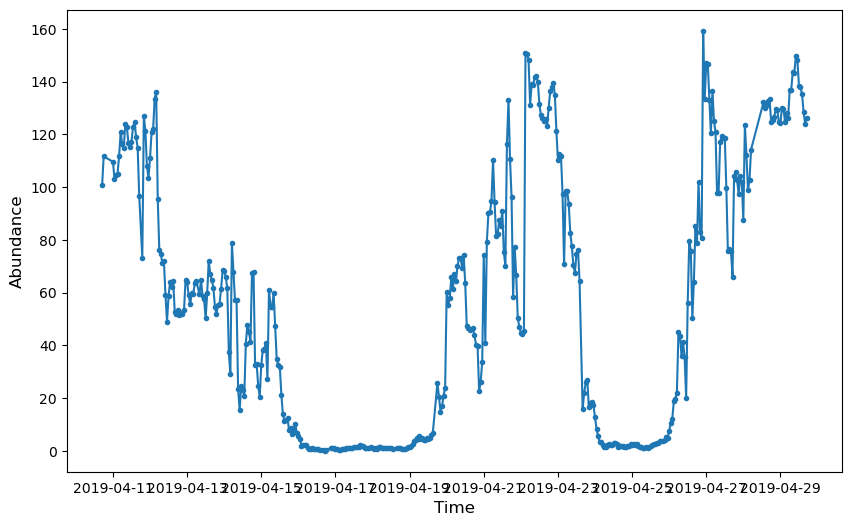

In [34]:
# plot time and cell abundance
fig, axs = plt.subplots(figsize=(10,6))
x = pro_df.index
y = pro_df['abundance']
axs.plot(x, y, marker='.')
axs.set_xlabel('Time', fontsize=12)
axs.set_ylabel('Abundance', fontsize=12)

Text(0, 0.5, 'Abundance')

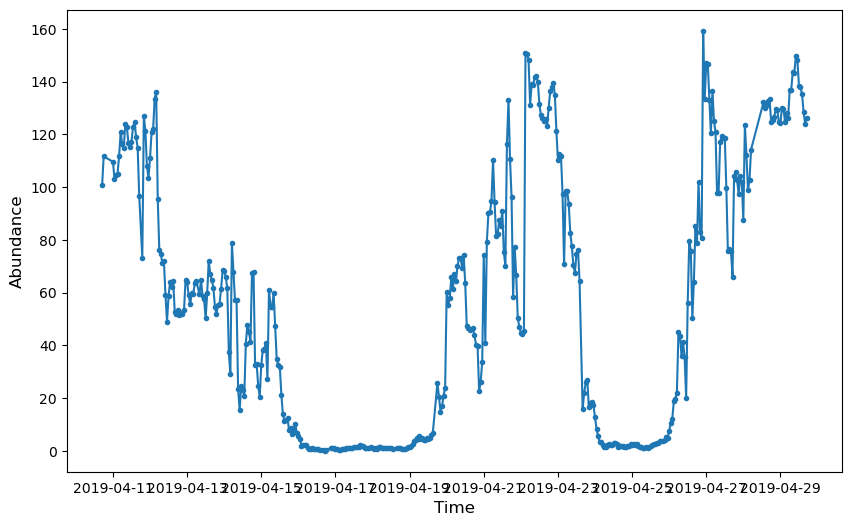

In [35]:
# plot time and cell abundance
fig, axs = plt.subplots(figsize=(10,6))
axs.plot(pro_df['abundance'], marker='.')
axs.set_xlabel('Time', fontsize=12)
axs.set_ylabel('Abundance', fontsize=12)

Text(0.5, 1.0, 'Latitude and Prochlorococcus Cell Abundance')

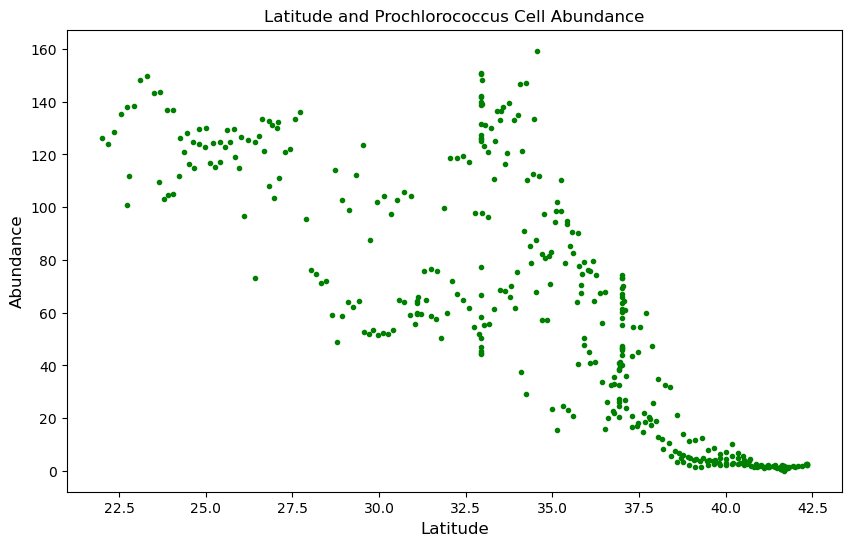

In [40]:
# what about latitude and cell abundance?
# plot time and cell abundance
fig, axs = plt.subplots(figsize=(10,6))
x = pro_df['lat']
y = pro_df['abundance']
axs.scatter(x, y, marker='.', c='g')
axs.set_xlabel('Latitude', fontsize=12)
axs.set_ylabel('Abundance', fontsize=12)
axs.set_title('Latitude and Prochlorococcus Cell Abundance')

Text(0.5, 1.0, 'Latitude and Cellular Carbon')

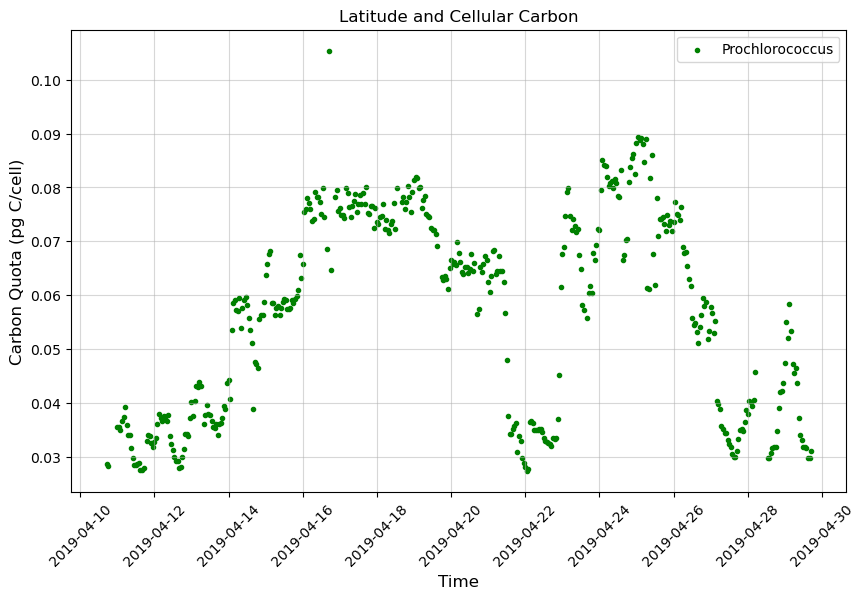

In [92]:
from datetime import datetime
import matplotlib.dates as mdates

fig, axs = plt.subplots(figsize=(10,6))
x = pro_df.index
y = pro_df['Qc_hour']
axs.scatter(x, y, marker='.', c='g', label='Prochlorococcus')
axs.set_xlabel('Time', fontsize=12)
axs.set_ylabel('Carbon Quota (pg C/cell)', fontsize=12)

# customize x axis
axs.xaxis.set_major_locator(mdates.DayLocator(interval=2))
axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
axs.tick_params(axis='x', labelrotation=45)
axs.grid(alpha=0.5)

# add legend
axs.legend()

axs.set_title('Latitude and Cellular Carbon')

## xarray activity

## Background
<div>
<center>
<img src="https://www.teledynemarine.com/en-us/products/PublishingImages/RDI/732x732/RDI%20workhorse%20II%20Sentinel%20top.jpg" 
width = "300"/>
<center>
</div>

    
<div>
<center>
<img src="https://www.researchgate.net/profile/David-Mueller-5/publication/284587353/figure/fig1/AS:643152750854144@1530350973294/Illustration-of-a-boat-mounted-acoustic-Doppler-current-profiler-ADCP-measuring.png" 
width = "700"/>
<center>
</div>

An ADCP (Acoustic Doppler Current Profiler) is a critical oceanographic instrument used throughout the world to measure horizontal currents in a water column. It does so by sending out acoustic signals that are reflected off of moving particles in the water, and then measuring the doppler shift from the returned signal and backing out a velocity. Below, we are going to look at an example of some ADCP data from the Equatorial Indian Ocean as apart of the RAMA array. 

### Load dataset and explore the data

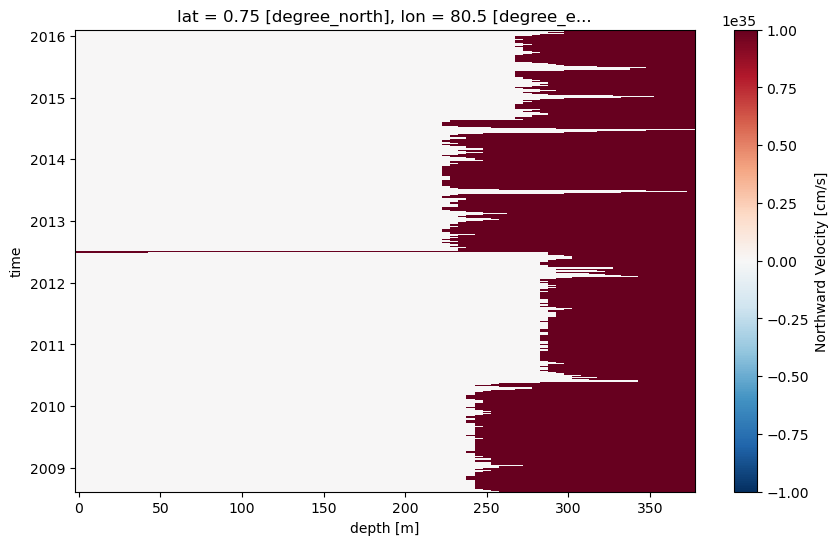

In [2]:
file = 'adcp_0.75n80.5e_rm5.cdf' # File path
ADCP = xr.open_dataset(file) # Opening netcdf using xarray
ADCP
v = ADCP['v_1206'] # Assigning variable to DataArray
v.shape

plt.figure(figsize = (10,6)) # Creating figure 

v.plot() # Quick and easy way to plot with xarray datasets - Since our data is 2D, xarray defaults to plt.pcolormesh()
# If our plot was 1D (i.e. time on x axis and velocity on y axis), xarray would default to plt.plot()

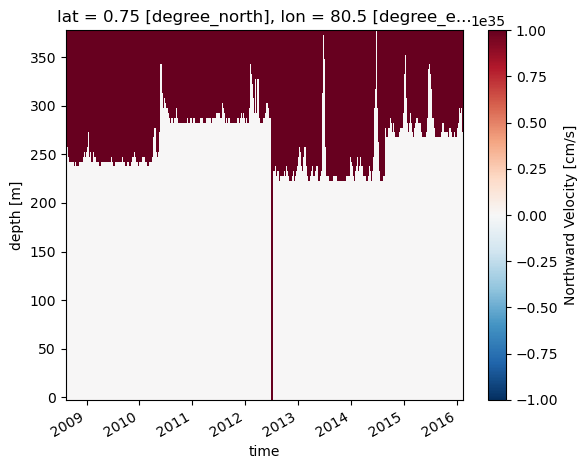

In [3]:
v.T.plot() # Using .T to transpose datarray for better axes

In [4]:
v_new = xr.where(v == 1e35, np.NaN, v) # Using xarray .where to mask infinite values as NaNs for clarity

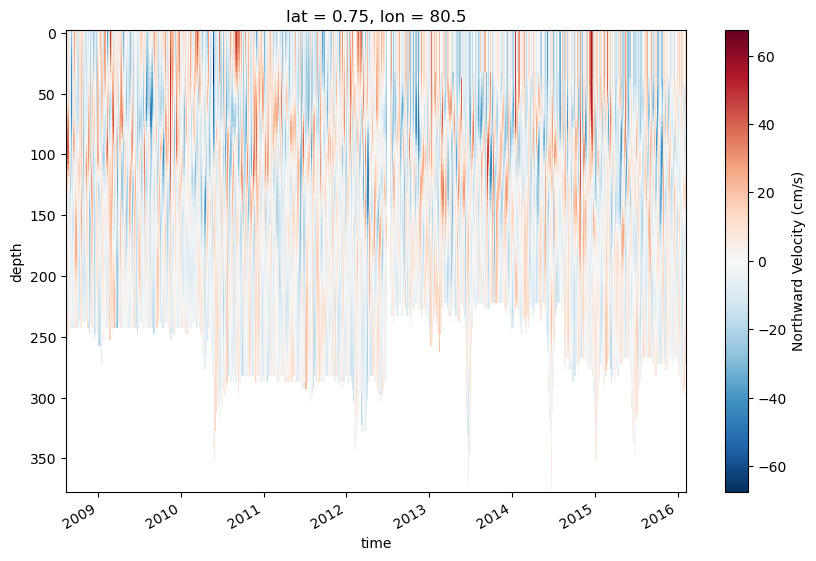

In [5]:
plt.figure(figsize = (10,6)) # Creating figure
v_new.T.plot(yincrease = False, cbar_kwargs = {"label": "Northward Velocity (cm/s)"}) # Plotting

### additional ways to flip the y axis
# plt.ylim(375, 0) # Flipping y axis so depth goes down

# plt.gca().invert_yaxis() # Reversing y axis (another method)


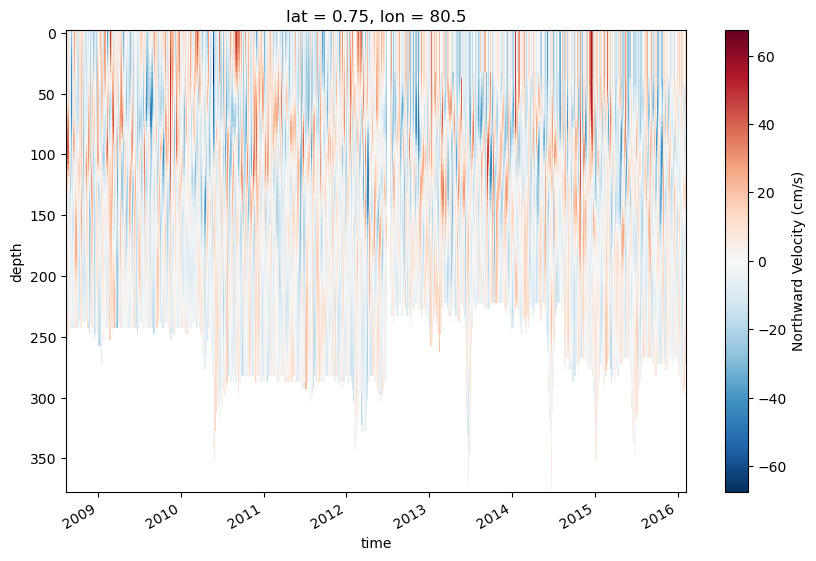

In [10]:
plt.figure(figsize = (10,6))
v_new.plot(x = 'time', y = 'depth', yincrease=False, 
           cbar_kwargs = {"label": "Northward Velocity (cm/s)"}) # You can also plot by specifying which coordinates to grab 

In [8]:
v_upd = v_new.isel(lat = 0, lon = 0)

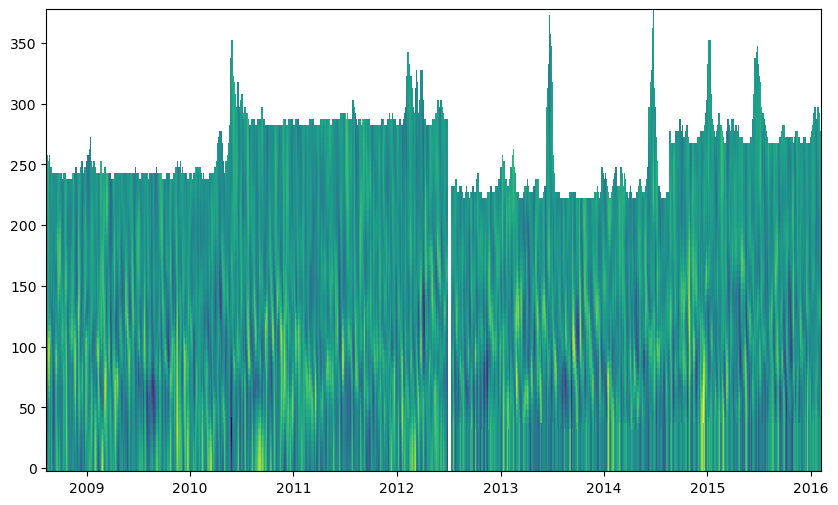

In [9]:
plt.figure(figsize = (10,6))
plt.pcolormesh(v_upd['time'], v_upd['depth'], v_upd.T) # This is how you would do it with the standard formatting in matplotlib (harder!)